In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fblock

In [2]:
# Loading input file: CV and bias
data = np.loadtxt('cv-bias_test.dat')

In [4]:
# Check result of block transformation
print ("Possible number of block transformation:")
print ( len(fblock.blocker(data, multi=2)[1]) ) # Multi indicate the number of replicas

Possible number of block transformation:
2


In [6]:
# Few block transformations are possible.
# The check function attempt cutting few points at the end of each  replica
# to get a larger number of block transformations
cv,bias = fblock.check(data[...,1],data[...,2],multi=2)

Removing 1 at the bottom of each replica
Possible blocks transformation: 48



In [8]:
# Now we can proceed to reblock the dataset.
# The fblocking function will calculate 
# the mean error of the free energy in kJ/mol units.
stat = fblock.fblocking(cv, bias, temp=323, multi=2)

/Users/fpesce/SCRIPTS/BLOCKING/MonoFES/fblock.py:82: RuntimeWarning: invalid value encountered in true_divide
  e = kbt * (e / u)


<ErrorbarContainer object of 3 artists>

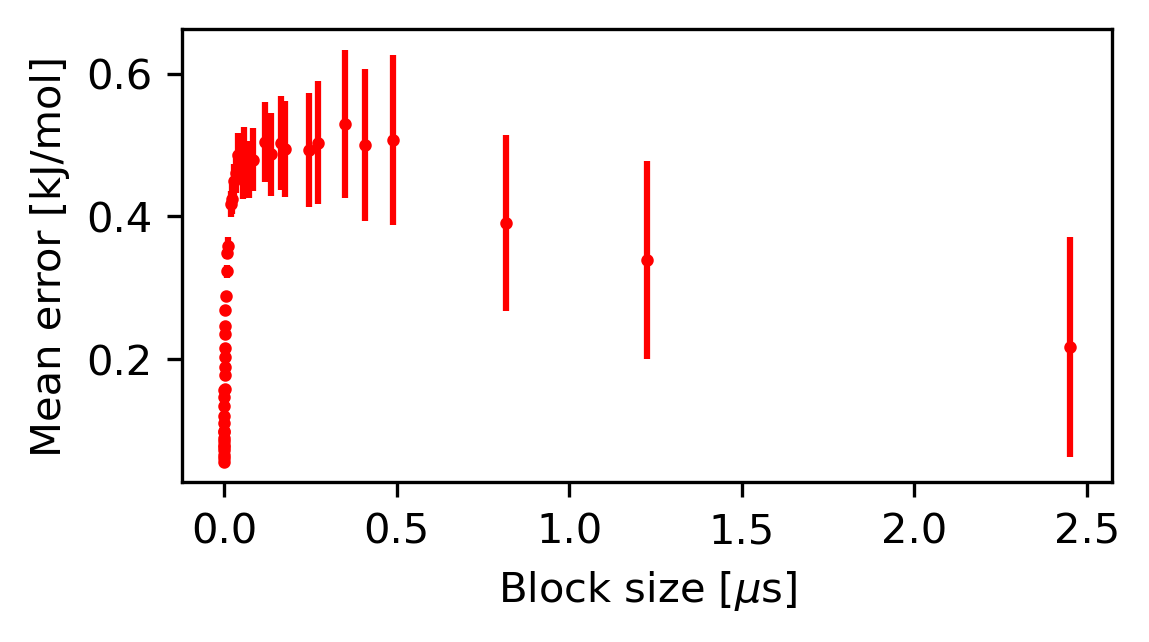

In [13]:
# Plotting the blocking result
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel(r'Block size [$\mu$s]')
plt.ylabel('Mean error [kJ/mol]')
plt.errorbar(stat[...,0]/1e5,stat[...,1],stat[...,2],fmt='ro',ms=2)

In [16]:
# The function optimal_block estimate the block size for which data become uncorrelated
# and the corresponding error at the fixed point, the one you should use as uncertainty
# on your average
#
# Currently 2 methods are implemented. Look at the README.md for more details.
# I'll show you both.
corr_len1, err1 = fblock.optimal_block(len(cv),stat,method="b3")
print("Correlation length: %i" %(corr_len1))
print("Error on the mean: %f\n" %(err1))

Correlation length: 1167
Error on the mean: 0.358894



In [17]:
corr_len2, err2 = fblock.optimal_block(len(cv),stat,method="knee_loc")
print("Correlation length: %i" %(corr_len2))
print("Error on the mean: %f" %(err2))

Correlation length: 3890
Error on the mean: 0.485662


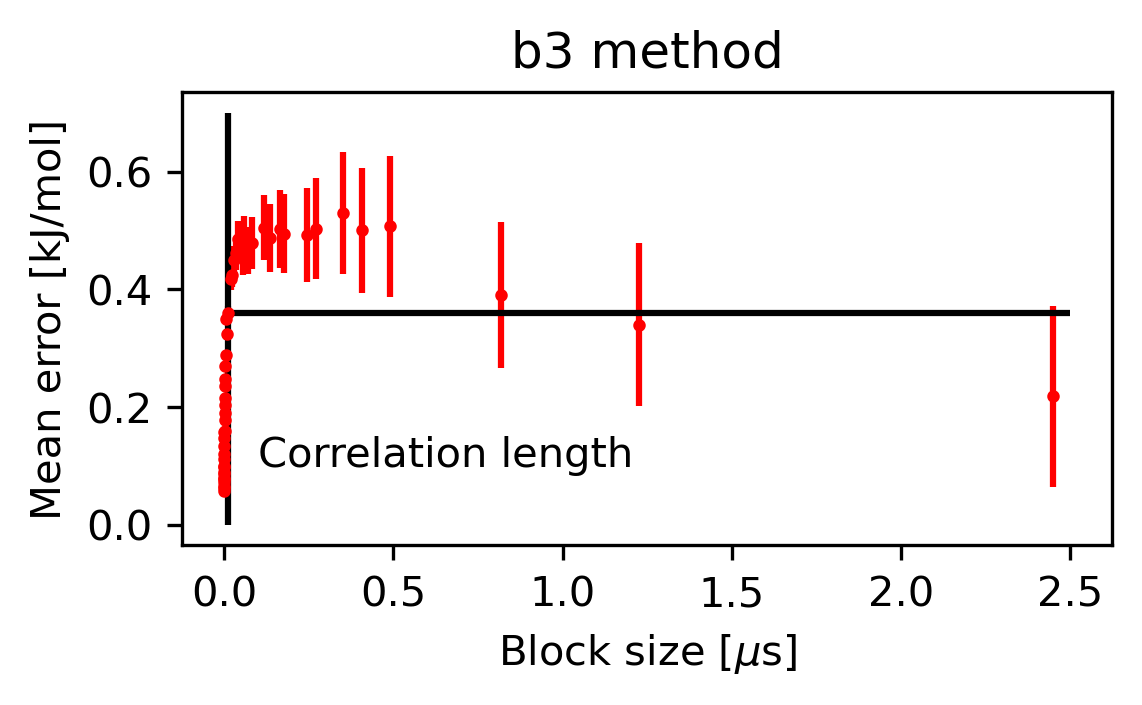

In [33]:
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel(r'Block size [$\mu$s]')
plt.ylabel('Mean error [kJ/mol]')
plt.errorbar(stat[...,0]/1e5,stat[...,1],stat[...,2],fmt='ro',ms=2)
plt.vlines(corr_len1/1e5,0,0.7)
plt.hlines(err1,0,2.5)
plt.text(0.1,0.1,'Correlation length')
plt.title('b3 method')
plt.show()

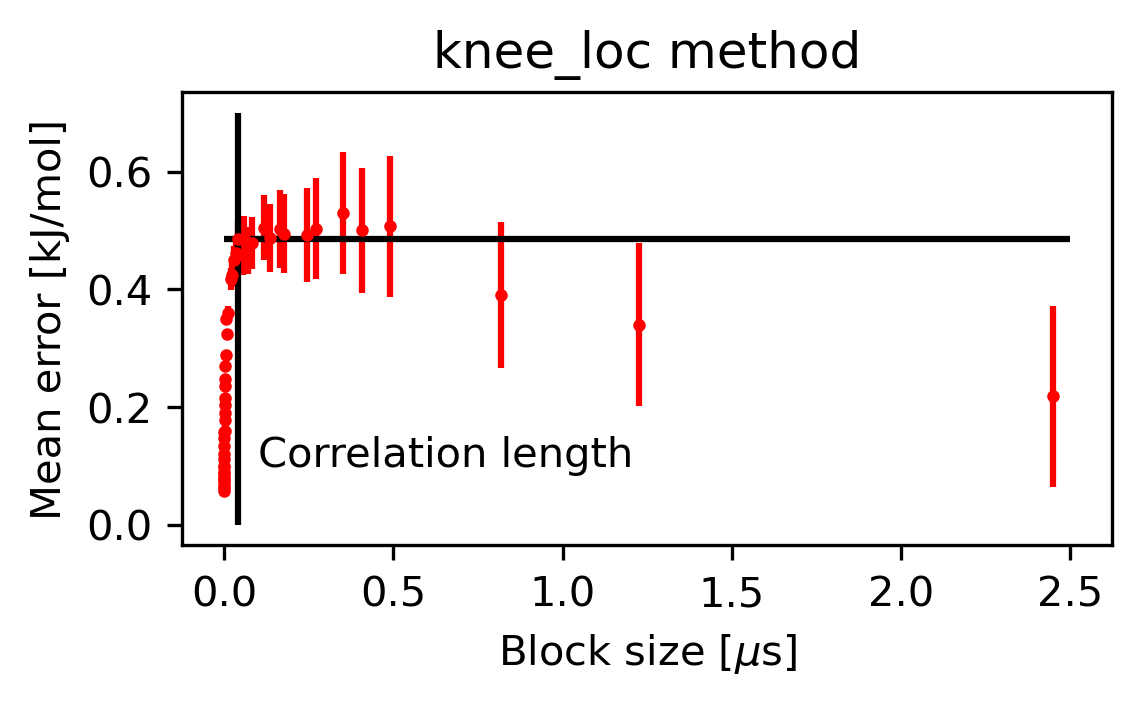

In [36]:
# "knee_loc" method seems to work better. Nonetheless, it depends on a 
# soft parameter you can adjust with the argument S.
# I tried to set a default S that should be a good compromise in most of the cases.
# Beware this part is still in development, please try both the methods with your
# data and let me know about the results.
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel(r'Block size [$\mu$s]')
plt.ylabel('Mean error [kJ/mol]')
plt.errorbar(stat[...,0]/1e5,stat[...,1],stat[...,2],fmt='ro',ms=2)
plt.vlines(corr_len2/1e5,0,0.7)
plt.hlines(err2,0,2.5)
plt.text(0.1,0.1,'Correlation length')
plt.title('knee_loc method')
plt.show()